In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chakr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('omg.csv')
data.head(10)

,tweet_id,text,source,user_id,sentiment,topic,rumor_label
0,1,New study suggests that drinking lemon water c...,Twitter,123456,Positive,Health,True
1,2,Breaking News: UFO spotted over New York City!...,News,789012,Neutral,UFO,False
2,3,Alert: Beware of fake COVID-19 vaccine scams c...,Government,345678,Negative,COVID-19,False
3,4,Rumors circulating about a potential merger be...,Twitter,567890,Neutral,Tech,True
4,5,New conspiracy theory suggests that the moon l...,Online Forum,901234,Negative,Conspiracy,True
5,6,No evidence to support claims of a cure for ba...,News,567890,Neutral,Health,False
6,7,Local community spreading rumors about a new h...,Twitter,123456,Neutral,Community,True
7,8,Scientific community dismisses claims of a cur...,Online Forum,345678,Negative,Health,False
8,9,Rumors of a celebrity breakup spark controvers...,Twitter,789012,Neutral,Celebrity,True
9,10,Social media platforms crackdown on fake news ...,News,901234,Positive,Social Media,False


In [3]:
data.shape

(228, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     228 non-null    int64 
 1   text         228 non-null    object
 2   source       228 non-null    object
 3   user_id      228 non-null    int64 
 4   sentiment    228 non-null    object
 5   topic        228 non-null    object
 6   rumor_label  228 non-null    bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 11.0+ KB


In [5]:
data.isna().sum()

tweet_id       0
text           0
source         0
user_id        0
sentiment      0
topic          0
rumor_label    0
dtype: int64

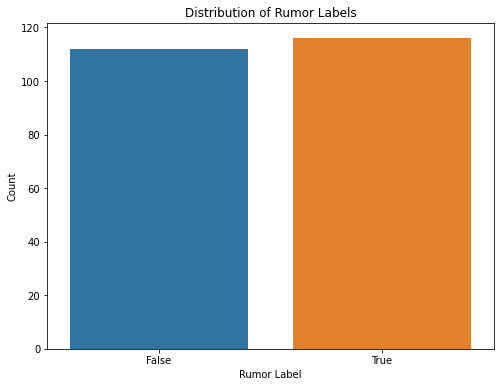

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rumor_label', data=data)
plt.title('Distribution of Rumor Labels')
plt.xlabel('Rumor Label')
plt.ylabel('Count')
plt.show()

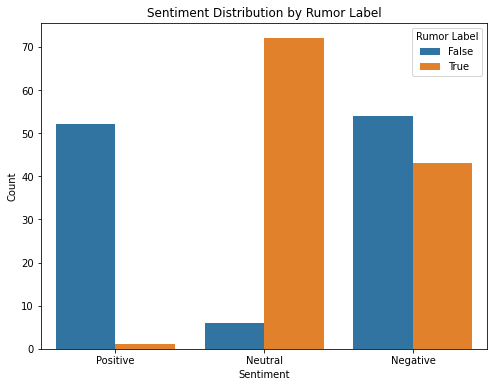

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='rumor_label', data=data)
plt.title('Sentiment Distribution by Rumor Label')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Rumor Label')
plt.show()

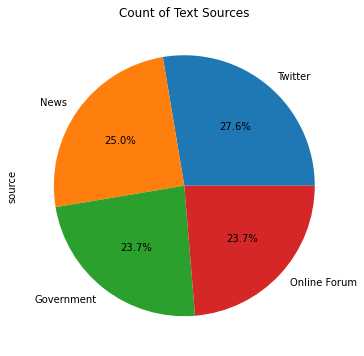

In [8]:
text_source_counts = data['source'].value_counts()
plt.figure(figsize=(8, 6))
text_source_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Count of Text Sources')
plt.show()

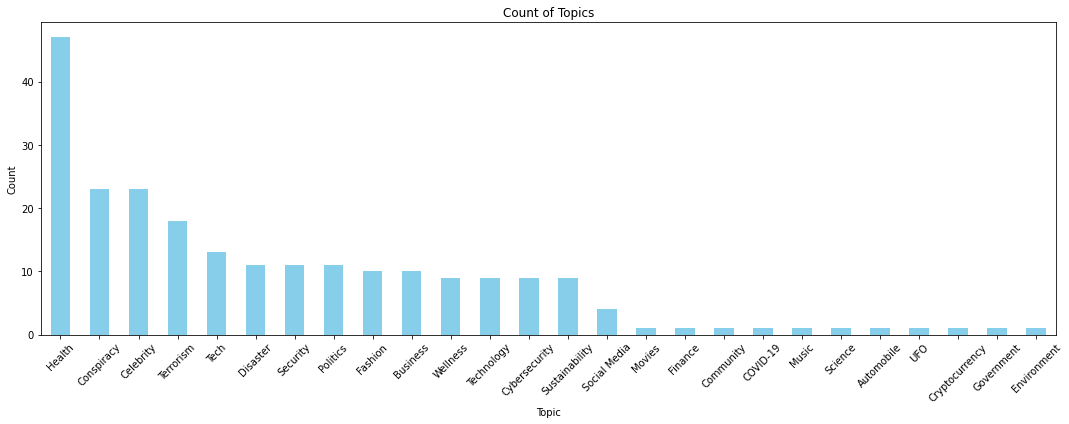

In [9]:
text_source_counts = data['topic'].value_counts()
plt.figure(figsize=(15, 6))
text_source_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
X = data['text']
y = data['rumor_label']

In [11]:
print(X,"\n\n\n",y)

0      New study suggests that drinking lemon water c...
1      Breaking News: UFO spotted over New York City!...
2      Alert: Beware of fake COVID-19 vaccine scams c...
3      Rumors circulating about a potential merger be...
4      New conspiracy theory suggests that the moon l...
                             ...                        
223    Rumors of a government conspiracy to manipulat...
224    Breaking: Rumors\r\n\r\n of a potential natura...
225    Rumors of a new celebrity endorsement deal in ...
226    Reports of a new trend in mindfulness meditati...
227    Rumors of a major security breach at a leading...
Name: text, Length: 228, dtype: object 


 0       True
1      False
2      False
3       True
4       True
       ...  
223     True
224    False
225     True
226    False
227     True
Name: rumor_label, Length: 228, dtype: bool


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [13]:
X_vectorized

<228x282 sparse matrix of type '<class 'numpy.float64'>'
	with 2101 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score,classification_report

from sklearn.svm import LinearSVC

S_classifier = LinearSVC()
S_classifier.fit(X_train, y_train)
y_pred = S_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        24
        True       0.96      1.00      0.98        22

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        24
        True       0.96      1.00      0.98        22

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        24
        True       0.96      1.00      0.98        22

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        24
        True       0.96      1.00      0.98        22

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



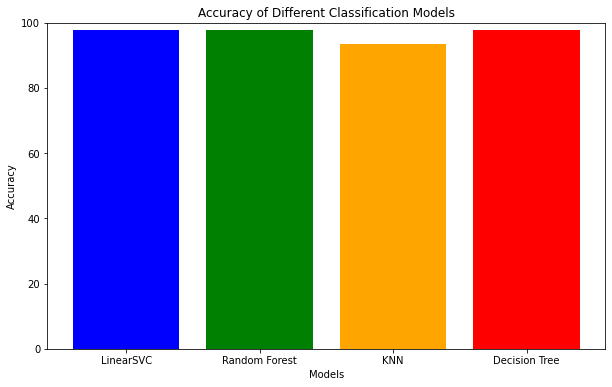

The best model is 'LinearSVC' with an accuracy of 97.82608695652173


In [19]:
models = ['LinearSVC', 'Random Forest', 'KNN', 'Decision Tree']
accuracies = [svm_accuracy, rf_accuracy, knn_accuracy, dt_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 100)
plt.show()

best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print(f"The best model is '{best_model}' with an accuracy of {max(accuracies)}")

In [20]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [21]:
y_pred = classifier.predict(X_test)

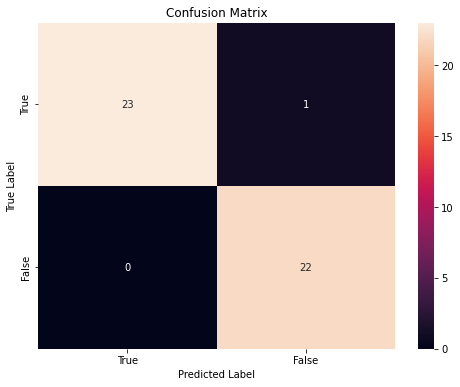

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
example_text = [input("enter rumor : ")]
example_text_vectorized = vectorizer.transform(example_text)
prediction = classifier.predict(example_text_vectorized)
print("Example prediction:", prediction)

enter rumor : aliens spotted
Example prediction: [False]


In [24]:
import pickle

In [25]:
pickle.dump(classifier, open(r'C:\Users\chakr\OneDrive\Desktop\omg\model', 'wb'))

In [26]:
x=pickle.load(open(r'C:\Users\chakr\OneDrive\Desktop\omg\model','rb'))

In [27]:
example_text = [input("enter rumor : ")]
example_text_vectorized = vectorizer.transform(example_text)
prediction = classifier.predict(example_text_vectorized)
x.predict(example_text_vectorized)

enter rumor : aliens in nri


array([False])